## Convolutional Neural Networks

### TASK1:
In this task, we explore feature extraction using convolutional filters in PyTorch. We implement common filters such as horizontal and vertical edge detectors, diagonal edge detectors, a blurring kernel, and an identity kernel. We then apply these filters to the load_digits dataset from sklearn.datasets, which consists of 8×8 grayscale images of handwritten digits. Our custom corr2d function performs 2D convolution operations, including padding for seamless edge detection. The results are visualized to observe how different filters highlight structural features of the images.

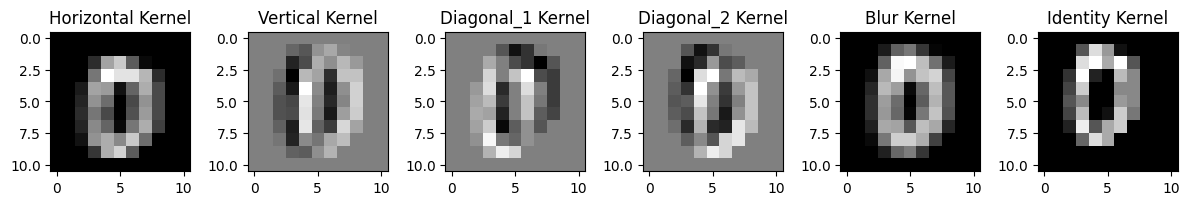

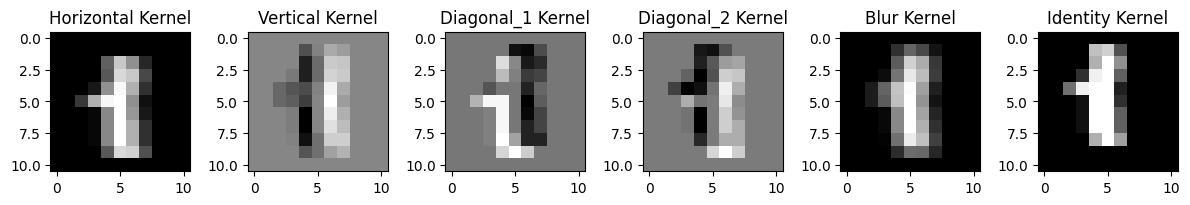

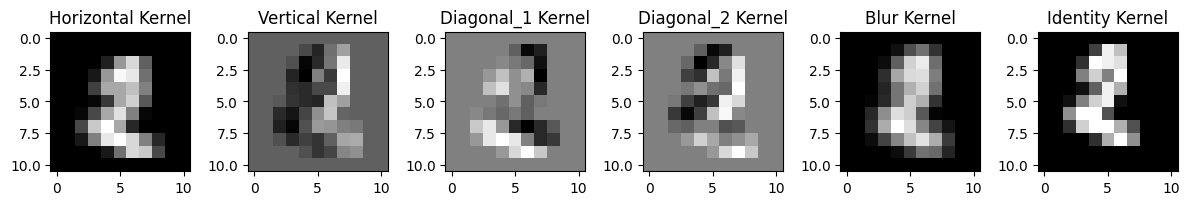

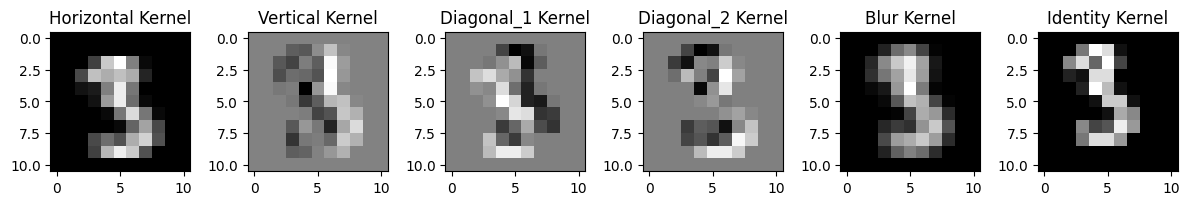

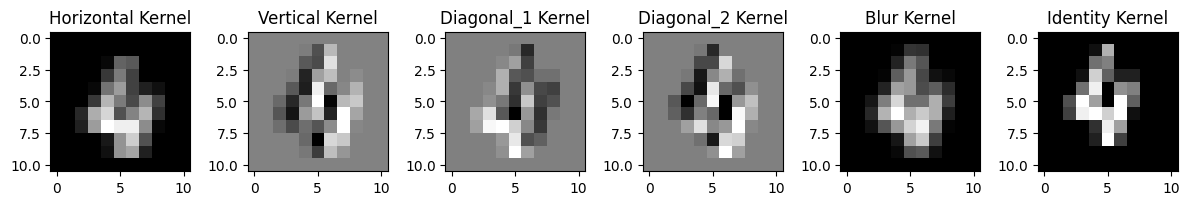

In [ ]:
from sklearn.datasets import load_digits
import torch
import matplotlib.pyplot as plt

digits = load_digits()

images = digits.images # Shape: (1797, 8, 8)
#print(images[1].shape) # Shape: (8,8)

kernels = {
    #Filters: Horizontal, vertical, two diagonal edge, blurring kernel, and a pass-through (identity)
    "Horizontal" : torch.tensor([[1, 1], [0, 0]]),
    "Vertical" : torch.tensor([[1, -1], [1, -1]]),
    "diag_1":  torch.tensor([[0, 1], [-1, 0]]),
    "diag_2": torch.tensor([[1, 0], [0, -1]]),
    "blur": torch.tensor([[1, 1], [1, 1]]) / 9.0,
    "identity": torch.tensor([[0, 0], [0, 1]])
}

def corr2d(X, kernel):

  # Creating a tensor of the image data and the kernel with the copy of the inputs.
  X = torch.tensor(X)

  # Adding pad as given in the question (2).
  # Adding 2 layers of zeros around the input matrix.
  X = torch.nn.functional.pad(X, (2, 2, 2, 2), "constant", 0) # (12,12)

  # Creating an empty tensor to store the result of the convolution operation.
  # Shape of convolued matrix = [input - filter + 1, input - filter + 1]
  convoluted_matrix = torch.zeros(
      # 12 - 2 + 1 = 11
      (X.shape[0] - kernel.shape[0] + 1,
      # 12 - 2 + 1 = 11
       X.shape[1] - kernel.shape[1] + 1)
  )
  # Shape of the Convoluted matrix: (10, 10)

  for i in range(convoluted_matrix.shape[0]):
    for j in range(convoluted_matrix.shape[1]):
      convoluted_matrix[i, j] = (X[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel).sum()

  return convoluted_matrix

# Applying CNN to the images
for index, image in enumerate(images[:5]):
  horizontal_convoluted_matrix = corr2d(image, kernels["Horizontal"])
  vertical_convoluted_matrix = corr2d(image, kernels["Vertical"])
  diag_1_convoluted_matrix = corr2d(image, kernels["diag_1"])
  diag_2_convoluted_matrix = corr2d(image, kernels["diag_2"])
  blur_convoluted_matrix = corr2d(image, kernels["blur"])
  identity_convoluted_matrix = corr2d(image, kernels["identity"])

  # Generating feature maps from 5 different classes
  kernel_names = ['Horizontal', 'Vertical', 'Diagonal_1', 'Diagonal_2', 'Blur', 'Identity']

  plt.figure(figsize=(12, 5))
  for j, image in enumerate([horizontal_convoluted_matrix,
                             vertical_convoluted_matrix,
                             diag_1_convoluted_matrix,
                             diag_2_convoluted_matrix,
                             blur_convoluted_matrix,
                             identity_convoluted_matrix]):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image,  cmap='gray')
    plt.title(f"{kernel_names[j]} Kernel")
    plt.tight_layout()
plt.show()

### TASK 2

Pooling helps in reducing the spatial resolution of feature maps while preserving important features. We implement a pool2d function in PyTorch that supports both max pooling and average pooling. This function is applied to the feature maps obtained in Task 1. We then visualize the pooled feature maps to analyze the impact of pooling on feature retention and dimensionality reduction.

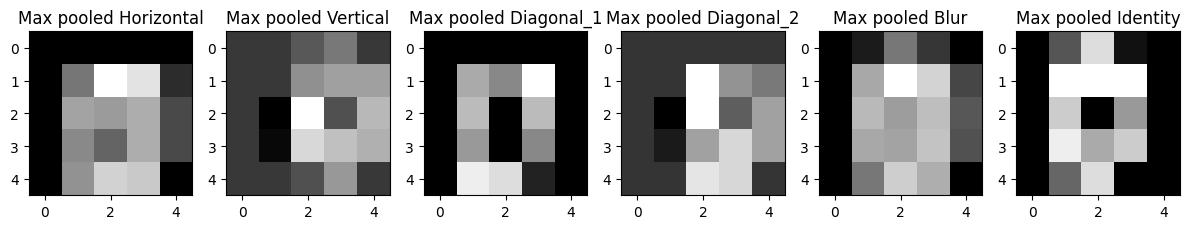

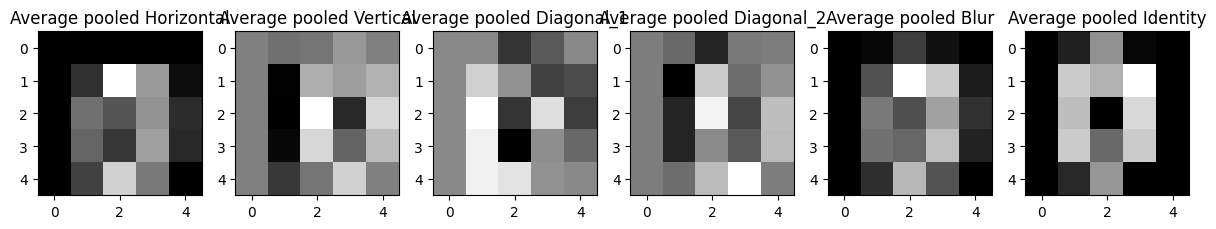

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


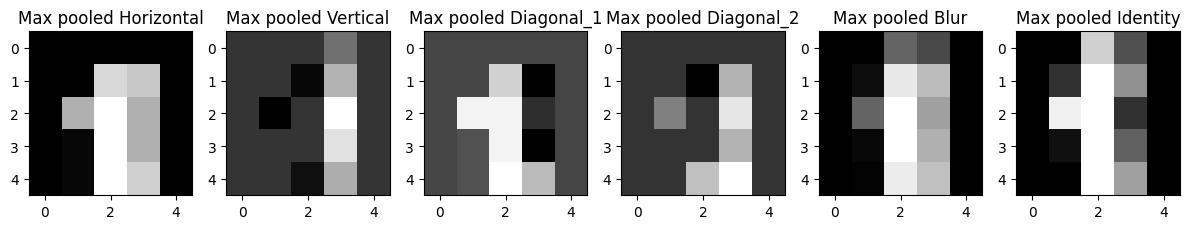

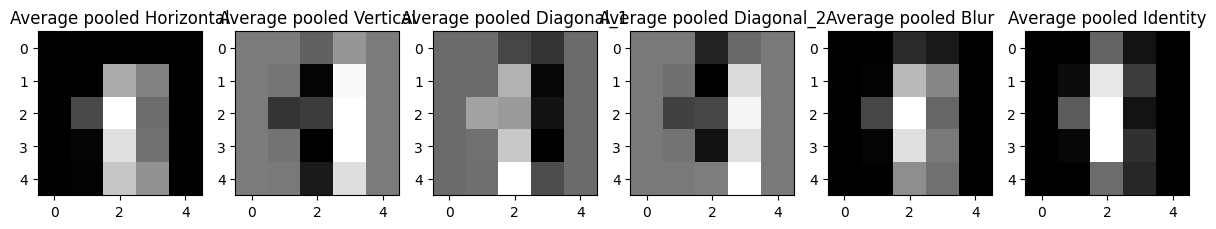

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


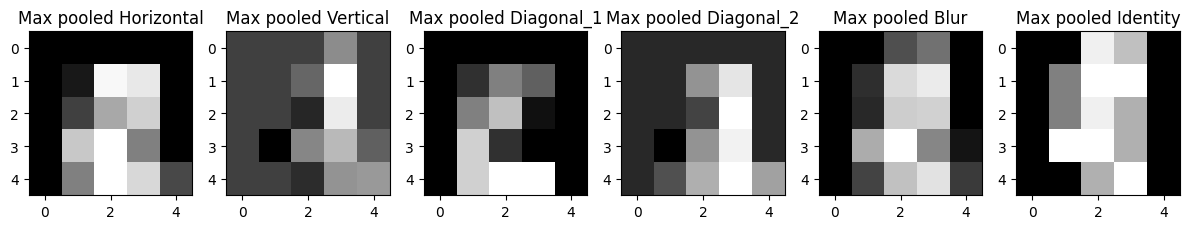

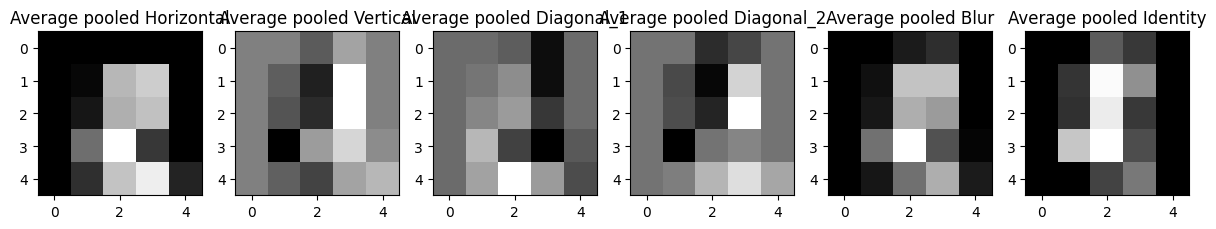

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


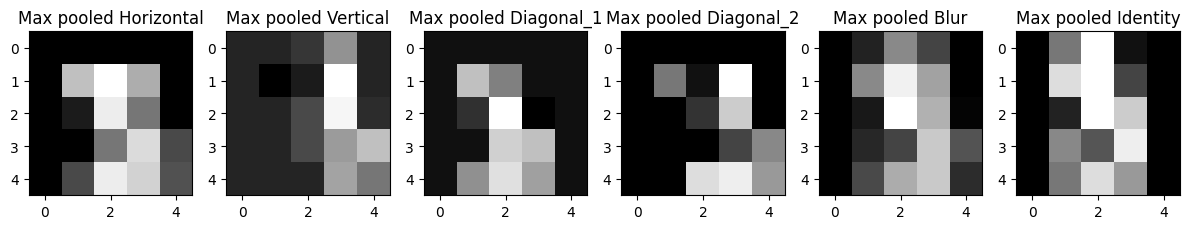

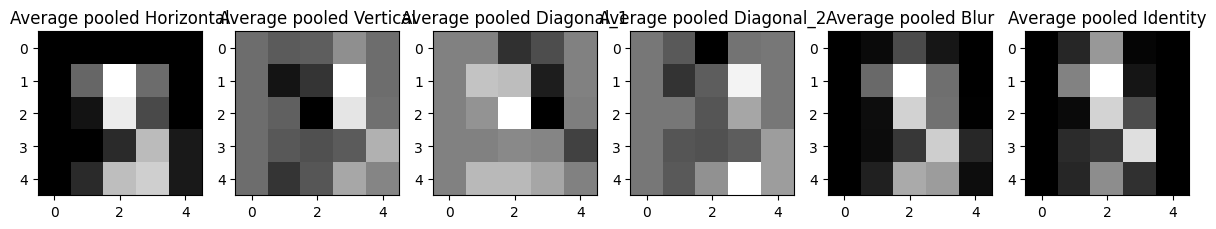

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


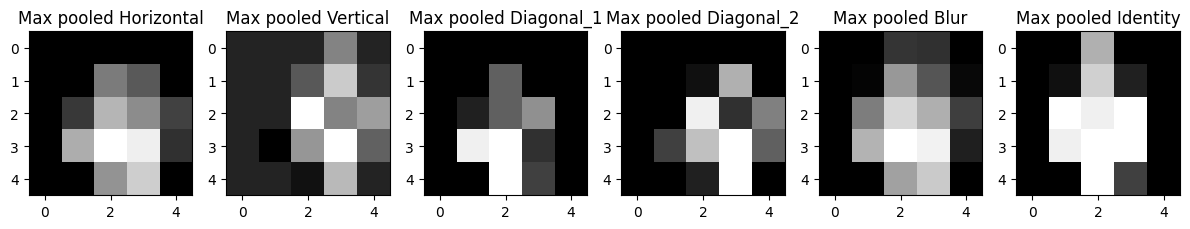

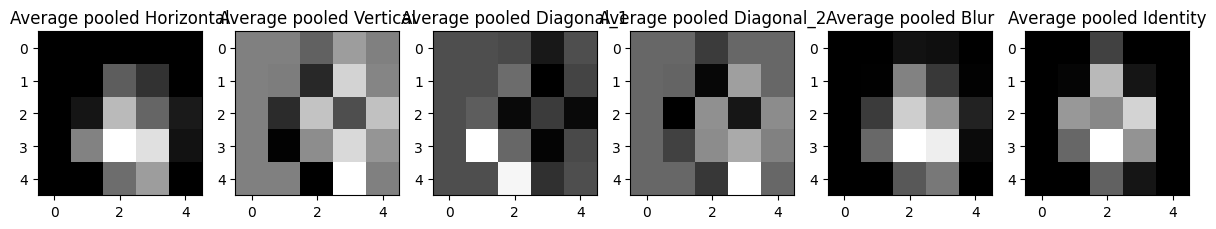

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


In [ ]:
# Stride of 2 and a window size of 2x2

def pool2d(X, technique, window_size = 2, stride = 2):
  """
  X : Convoluted matrix
  technique : Max or average
  window_size : Size of the window

  Returns: Pooled matrix
  """
  h,w = X.shape
  output_height = int(((h - window_size) / stride) + 1)
  output_width = int(((w - window_size) / stride) + 1)

  pooled_matrix = torch.zeros((output_height, output_width))

  for i in range(output_height):
    for j in range(output_width):
        pooling_region = X[i * window_size : (i+1) * window_size, j * window_size : (j+1) * window_size]

        if technique == 'max':
          pooled_matrix[i, j] = torch.max(pooling_region)
        elif technique == 'avg':
          pooled_matrix[i, j] = torch.mean(pooling_region)

  return pooled_matrix

for index, image in enumerate(images[:5]):
  horizontal_convoluted_matrix = corr2d(image, kernels["Horizontal"])
  vertical_convoluted_matrix = corr2d(image, kernels["Vertical"])
  diag_1_convoluted_matrix = corr2d(image, kernels["diag_1"])
  diag_2_convoluted_matrix = corr2d(image, kernels["diag_2"])
  blur_convoluted_matrix = corr2d(image, kernels["blur"])
  identity_convoluted_matrix = corr2d(image, kernels["identity"])

  shape_before_pooling = horizontal_convoluted_matrix.shape

  kernel_names = ['Horizontal', 'Vertical', 'Diagonal_1', 'Diagonal_2', 'Blur', 'Identity']

  plt.figure(figsize=(12, 5))
  window_size = 2
  stride = 2

  # Performing Pooling using max pooling
  pooled_images = ([pool2d(horizontal_convoluted_matrix, technique="max"),
                    pool2d(vertical_convoluted_matrix, technique="max"),
                    pool2d(diag_1_convoluted_matrix, technique="max"),
                    pool2d(diag_2_convoluted_matrix, technique="max"),
                    pool2d(blur_convoluted_matrix, technique="max"),
                    pool2d(identity_convoluted_matrix, technique="max")])
  for j, image in enumerate(pooled_images):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Max pooled {kernel_names[j]}")
    plt.tight_layout()
  plt.show()

  plt.figure(figsize=(12, 5))

  # Performing Pooling using max pooling
  avg_pooled_images = ([pool2d(horizontal_convoluted_matrix, technique="avg"),
                    pool2d(vertical_convoluted_matrix, technique="avg"),
                    pool2d(diag_1_convoluted_matrix, technique="avg"),
                    pool2d(diag_2_convoluted_matrix, technique="avg"),
                    pool2d(blur_convoluted_matrix, technique="avg"),
                    pool2d(identity_convoluted_matrix, technique="avg")])
  for j, image in enumerate(avg_pooled_images):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image,  cmap='gray')
    plt.title(f"Average pooled {kernel_names[j]}")
    plt.tight_layout()
  plt.show()

  print("Shape of the Original matrix", images[0].shape)
  print("Shape before pooling:", shape_before_pooling)
  print("Shape of the pooled matrix", pooled_images[0].shape)

### TASK 3
Building a Convolutional Neural Network using the PyTorch library, with an initial convolutional layer with 8 filters of size 3x3, padding set to 1, followed by a `ReLU` activation function. A second convolutional layer with 3 filters of size 3x3, again with padding 1 and followed by `ReLU` activation function. A max pooling layer with a 2x2 kernel to downsample the features. A fully connected layer with 120 units, followed by another fully connected layer with 84 units. Finally, the output layer has 10 units for classification (one for each digit from 0 to 9).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
     # Gives access to the methods and properties of nn.Module
    super(CNN, self).__init__()

    # Initialising layer 1 with 8 filters, 3x3 filter, padding of 1 and a stride of 1
    self.Con_layer_1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride=1, padding= 1)

    # Initialising layer 2 with 3 filters, 3x3 filter, padding of 1 and a stride of 1
    self.Con_layer_2 = nn.Conv2d(in_channels = 8, out_channels = 3, kernel_size = 3, stride=1, padding= 1)

    # Performing Max pooling
    self.max_pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)

    # Fully connected layers
    # Applies an affine linear transformation to the incoming data
    self.fc1 = nn.Linear(in_features = 3 * 4 * 4, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(in_features = 84, out_features = 10) # Output layer

  def forward(self, x):
    # Applying reLU to Layer 1
    x = F.relu(self.Con_layer_1(x))
    # Applying reLU to Layer 2
    x = F.relu(self.Con_layer_2(x))
    # Applyign max pooling
    x = self.max_pool(x)

    """
    After passing through 2 layer of convolutions, the shape of the input:
    3 (channels) * 4 (height) * 4 (width)
    """
    # Flattening the feature map
    x = x.view(-1, 3 * 4 * 4)

    # Applying relu activation for the fully connected layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    # Applying softmax to find the probabilities on the output layer
    x = self.fc3(x)

    return x

conv_net = CNN()

### TASK 4
Training the CNN on the `load_digits` dataset from `sklearn` using stochastic gradient descent, while monitoring both training loss and validation loss.

We start by preprocessing the load_digits dataset by normalizing the pixel values to fall between 0 and 1. Partition the data into 40% training, 40% validation, and 20% testing using repeated applications of `sklearn.model_selection.train_test_split`. We use stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.001 and momentum of 0.9. Then, we train this CNN for a minimum of 1000 epochs with a batch size of 16. After training, the training loss over time and the validation loss is plotted.

Epoch 1000/1000: 100%|██████████| 45/45 [00:00<00:00, 339.25it/s]


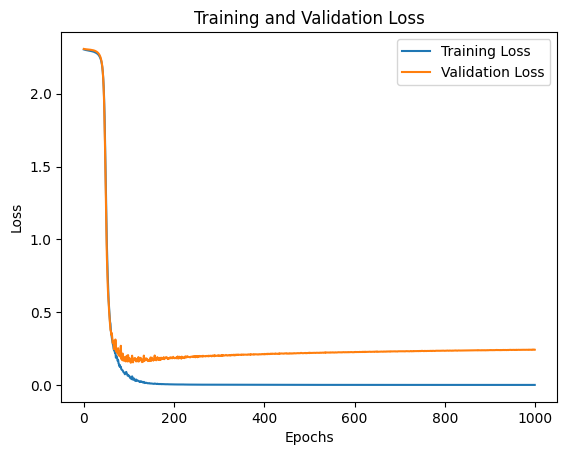

Accuracy of the model on the test set: 93.89%


<ipython-input-10-d1117c08c96b>:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  conv_net.load_state_dict(torch.load('parameters.pth'))


In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocessing the data so values are between 0 and 1
digits = load_digits()

# Flattened data matrix
a = digits.data # Shape: (1797, 64)

# Input images
X = digits.images # Shape: (1797, 8, 8)
#print(X[0])

# Classification target
y = digits.target # Shape: (1797,)

# Normalising the values - The feature values are between 0 to 16.
X = X / 16.0

# We have to reshape the data, X since Conv2d expects the input to be of the form (batch_size, channels, height, width)
x = X[:, np.newaxis, :, :] # Shape: (1797, 1, 8, 8)

# Partitioning the data - Training(40%), Validation(40%) and Test(20%)

# 60 % of the dataset is reserved for validation and testing while 40 % is assigned to X_train and y_train
X_train, X_res, y_train, y_res = train_test_split(x, y, test_size = 0.6, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_res, y_res, test_size = 0.333, random_state = 42)

#Converting the dataset into tensors
X_train, y_train = torch.tensor(X_train, dtype = torch.float32), torch.tensor(y_train, dtype = torch.long)
X_val, y_val = torch.tensor(X_val, dtype = torch.float32), torch.tensor(y_val, dtype = torch.long)
X_test, y_test = torch.tensor(X_test, dtype = torch.float32), torch.tensor(y_test, dtype = torch.long)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 16, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle = False)

conv_net = CNN()
# Using stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.001 and momentum of 0.9
optimizer = optim.SGD(conv_net.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

# Training for 1000 epochs
num_epochs = 1000

# Lists to store the training and validation losses
train_losses = []
val_losses = []

best_val_loss = float('inf')

for epoch in range(num_epochs):
    conv_net.train()
    #  Every epoch, record both the training and validation loss.
    train_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc = f"Epoch {epoch + 1}/{num_epochs}"):
        optimizer.zero_grad()
        # Generating the output for each input in train_loader
        output = conv_net(inputs)
        # Computing the loss between predictions and labels
        loss = criterion(output, labels)
        # Backward pass to update the parameters based on the loss
        loss.backward()
        optimizer.step()

        # Adding the loss for the current batch to the train_loss
        train_loss += loss.item() # item() extracts the loss as a float value

    # Calculating the training loss for each epoch
    average_train_loss = train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation phase
    # Setting the model to evaluation mode
    conv_net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            output = conv_net(inputs)
            loss = criterion(output, labels)
            val_loss += loss.item()

    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    # Checkpoint
    # Checking if the current validation loss is the least of all losses
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        # Saves the model parameters
        torch.save(conv_net.state_dict(), 'parameters.pth')

# Plotting the graph
plt.plot(train_losses, label = 'Training Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best model and evaluate on the test set
conv_net.load_state_dict(torch.load('parameters.pth'))
conv_net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = conv_net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

### TASK 5

Comparing the classification performance of the Convolutional Neural Network (CNN) to a traditional Support Vector Classifier (SVC) on the `load_digits` dataset from `sklearn`.

In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


digits = load_digits()
X = digits.images
y = digits.target

X = X[:, np.newaxis, :, :]

# Splittin the dataset into Training and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
# Splitting the dataset into Testing and validation set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Converting the dataset into tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

# Flatten the input arrays for SVC (treat pixels as independent features)
X_train_flat = X_train.view(X_train.size(0), -1).numpy()
X_val_flat = X_val.view(X_val.size(0), -1).numpy()
X_test_flat = X_test.view(X_test.size(0), -1).numpy()

# Convert targets to numpy
y_train = y_train.numpy()
y_val = y_val.numpy()
y_test = y_test.numpy()

# Implement Support vector machine
svc = SVC(gamma=0.001)
svc.fit(X_train_flat, y_train)

# Evaluate on the validation set
validation_set = svc.predict(X_val_flat)
validation_accuracy = accuracy_score(y_val, validation_set)
print(f"SVM validation accuracy: {validation_accuracy * 100:.2f}%")

# Evaluate on the test set
y_pred = svc.predict(X_test_flat)
flat_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM test accuracy: {flat_accuracy * 100:.2f}%")

SVM validation accuracy: 98.52%
SVM test accuracy: 97.04%


The SVM model is performing better compared to the CNN model.